In [1]:
import matplotlib.pyplot as plt 
from scipy.stats import gamma, beta, t
import pandas as pd
import seaborn as sns
from scipy import stats
import numpy as np

# 1. Density Estimation

### Generate some sample data

In [51]:
num_values = 500

actual_age = beta.rvs(100, 200 ,loc=10, scale=4, size=num_values)

actual_speed = gamma.rvs(a = 10, loc=10, scale=5, size=num_values)
          
correlation_dict = {'speed': sorted(actual_speed),
                      'age': np.sort(actual_age)[::-1] } 

df = pd.DataFrame.from_dict(correlation_dict) 

In [52]:
df.head(10)

,speed,age
0,26.651547,11.676955
1,26.882142,11.657962
2,27.006938,11.598576
3,27.328524,11.596881
4,27.498233,11.592822
5,29.094851,11.592205
6,31.500376,11.588976
7,31.663682,11.587149
8,31.872892,11.584301
9,31.985074,11.580984


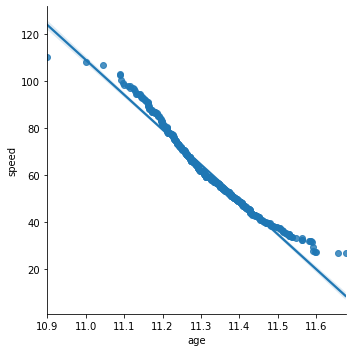

In [66]:
sns.lmplot(x ='age', y ='speed', data = df)

### Fitting a Beta Distribution to the data

In [71]:
age_a, age_b, age_loc, age_scale = beta.fit(df.age)
synthetic_age_beta = beta.rvs(age_a, age_b ,loc=age_loc,scale=age_scale,size=len(df.age))


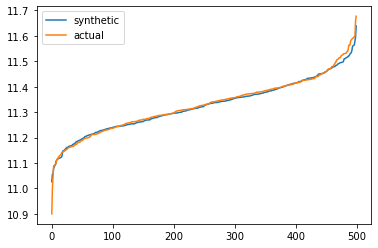

In [72]:
plt.plot(sorted(synthetic_age_beta), label='synthetic')
plt.plot(sorted(df.age), label='actual')
plt.legend()
plt.show()

In [73]:
speed_a, speed_loc, speed_scale = gamma.fit(df.speed)


# 2. Covariance and Correlation

Covariance = measure if elements from two arrays move in the same direction

correlation = normalized covariance (always between -1 and 1)

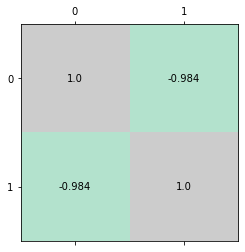

In [74]:
fig, ax = plt.subplots()

ax.matshow(df.corr().values, cmap=plt.cm.Pastel2)

for i in range(2):
    for j in range(2):
        c = round(df.corr().values[j,i], 3)
        ax.text(i, j, str(c), va='center', ha='center')

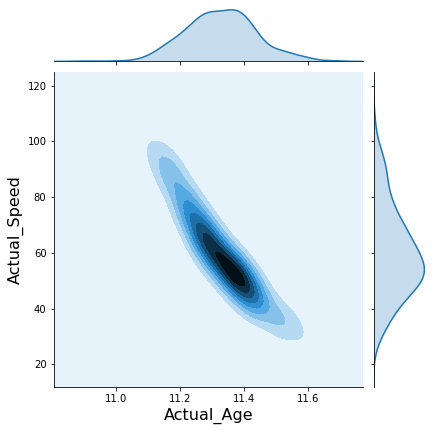

In [75]:

h = sns.jointplot(df.age, df.speed, kind='kde', stat_func=None);
h.set_axis_labels('Actual_Age', 'Actual_Speed',  fontsize=16);

In [76]:
mvnorm = stats.multivariate_normal(mean=[0, 0], cov=df.corr().values)
x = mvnorm.rvs(500)

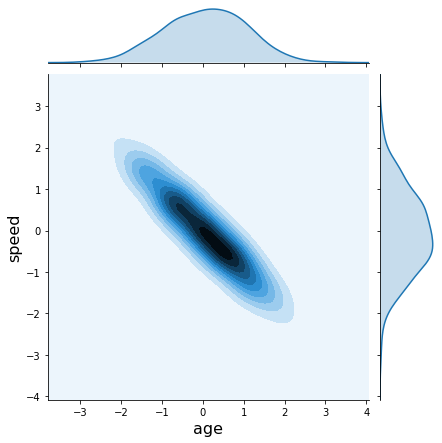

In [86]:
h = sns.jointplot(x[:, 0], x[:, 1], kind='kde', stat_func=None);
h.set_axis_labels('age', 'speed', fontsize=16);

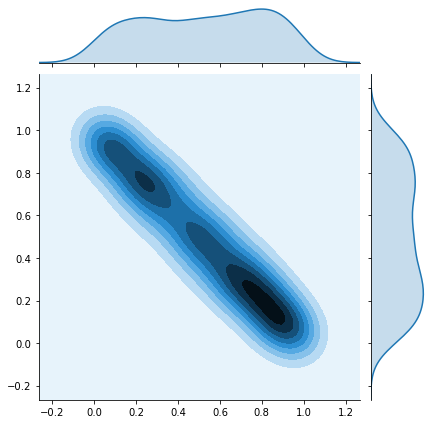

In [78]:
norm = stats.norm()
x_unif = norm.cdf(x)

h = sns.jointplot(x_unif[:, 0], x_unif[:, 1], kind='kde', stat_func=None)

In [79]:
age_distribution = stats.beta(a=age_a, b=age_b, loc=age_loc, scale=age_scale)  # Age column

speed_distribution = stats.gamma(a=speed_a, loc=speed_loc,scale=speed_scale)

### this is your synthetic data with desired distribution and covariance

ppf = inverse of CDF

In [80]:
age_ppf = age_distribution.ppf(x_unif[:, 0])

speed_ppf = speed_distribution.ppf(x_unif[:, 1])

In [81]:
synthetic_df = pd.DataFrame({ 'speed' : speed_ppf, 'age' : age_ppf})

### matches the original covariance above

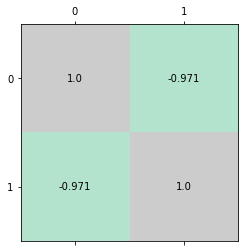

In [82]:

fig, ax = plt.subplots()

ax.matshow(synthetic_df.corr().values, cmap=plt.cm.Pastel2)

for i in range(2):
    for j in range(2):
        c = round(synthetic_df.corr().values[j,i], 3)
        ax.text(i, j, str(c), va='center', ha='center')

In [83]:
synthetic_df.head(10)

,speed,age
0,51.072039,11.388006
1,48.771792,11.404889
2,67.524480,11.253877
3,55.764738,11.342740
4,87.505506,11.169541
5,65.841903,11.271432
6,49.246262,11.430974
7,23.182784,11.679380
8,55.857747,11.382935
9,38.581149,11.474318


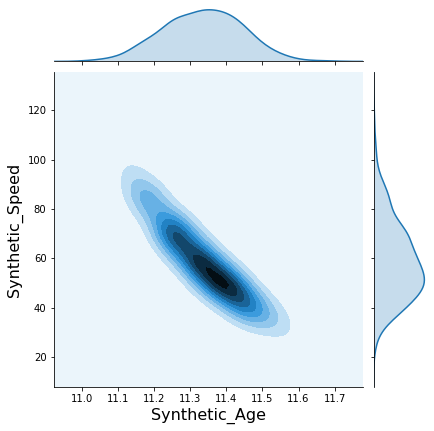

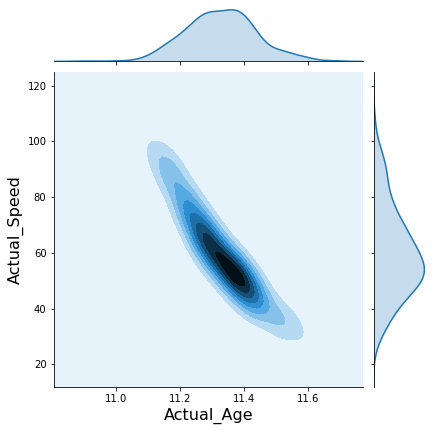

In [85]:

h = sns.jointplot(synthetic_df.age, synthetic_df.speed, kind='kde', stat_func=None);
h.set_axis_labels('Synthetic_Age', 'Synthetic_Speed',  fontsize=16);

h = sns.jointplot(df.age, df.speed, kind='kde', stat_func=None);
h.set_axis_labels('Actual_Age', 'Actual_Speed',  fontsize=16);